## Create Climatology for MOM

El metodo propuesto aqui, consiste en hacer un promedio de las climatologias para todos los ensembles (4 ensembles)

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import xesmf as xe
import sys
import gc
import warnings
warnings.filterwarnings('ignore')

In [2]:
sys.path.append('/home/brayan/mnsun/')
from utils import check_dir

In [3]:
MODELS = {"NCEP":{"reforecast":{"perturbed":{"10m_above_ground"     :{"10u"   :{"L": np.arange(0,44+1,1)     ,"M" : np.arange(1,3+1,1)},
                                                                      "10v"   :{"L": np.arange(0,44+1,1)     ,"M" : np.arange(1,3+1,1)}
                                                                      }, 
                                             },
                                 "control"  :{"10m_above_ground"     :{"10u"   :{"L": np.arange(0,44+1,1)     },
                                                                       "10v"   :{"L": np.arange(0,44+1,1)     }
                                                                       },
                                              }
                                },
                 }
         }

Descript_dataset = {"Insta_dataset"  :["10m_above_ground"],
                    "Mean_dataset_LB":["sfc_temperature"]}

In [4]:
INPUT_DATA  = "/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/"
OUTPUT_DIR = "/home/brayan/DATA/MOM/VIENTOS/NCEP/NOAA_CFS/"
dataset     = "10m_above_ground"

In [5]:
for model_name, v_1 in MODELS.items():
    if model_name in OUTPUT_DIR:
        print("LA SALIDA CONCUERDA CON EL MODELO DESCARGADO")
    else:
        break
    for type_sim, v_2 in v_1.items():
        for type_ini, v_3 in v_2.items():
            for var_cat, v_4 in v_3.items():
                dic_inf = {}
                for sc, vs  in zip(list(v_4.keys()),list(v_4.values())): 
                    dic_inf[sc] = vs
                    
                if type_ini == "control":
                    v_5 = dic_inf["10u"]  #Se asume que ambas suvbcategorias tienen el mismo grillado L
                    des = list(v_5.keys())
                    for cnt_1 in range(v_5[des[0]].shape[0]-1):
                        MODEL_DATA_X_pre   = INPUT_DATA + f"{model_name}/{type_sim}/{type_ini}/{var_cat}.{list(v_4.keys())[0]}/{dataset}_{list(v_4.keys())[0]}_{des[0]}{str(cnt_1)}.nc"
                        MODEL_DATA_Y_pre   = INPUT_DATA + f"{model_name}/{type_sim}/{type_ini}/{var_cat}.{list(v_4.keys())[1]}/{dataset}_{list(v_4.keys())[1]}_{des[0]}{str(cnt_1)}.nc"
                        MODEL_DATA_X_post  = INPUT_DATA + f"{model_name}/{type_sim}/{type_ini}/{var_cat}.{list(v_4.keys())[0]}/{dataset}_{list(v_4.keys())[0]}_{des[0]}{str(cnt_1+1)}.nc"
                        MODEL_DATA_Y_post  = INPUT_DATA + f"{model_name}/{type_sim}/{type_ini}/{var_cat}.{list(v_4.keys())[1]}/{dataset}_{list(v_4.keys())[1]}_{des[0]}{str(cnt_1+1)}.nc"                        
                        
                        
                        
                        print(MODEL_DATA_X_pre)
                        print(MODEL_DATA_Y_pre)
                        print(MODEL_DATA_X_post)
                        print(MODEL_DATA_Y_post)  
                        print("paso")
                else:
                    v_5 = dic_inf["10u"]  #Se asume que ambas suvbcategorias tienen el mismo grillado L
                    des = list(v_5.keys())
                    for cnt_1 in range(v_5[des[0]].shape[0]-1):
                        for cnt_2,_ in enumerate(v_5[des[1]]):
                            MODEL_DATA_X_pre  = INPUT_DATA + f"{model_name}/{type_sim}/{type_ini}/{var_cat}.{list(v_4.keys())[0]}/{dataset}_{list(v_4.keys())[0]}_{des[0]}{str(cnt_1)}_{des[1]}{str(cnt_2)}.nc"
                            MODEL_DATA_Y_pre  = INPUT_DATA + f"{model_name}/{type_sim}/{type_ini}/{var_cat}.{list(v_4.keys())[1]}/{dataset}_{list(v_4.keys())[1]}_{des[0]}{str(cnt_1)}_{des[1]}{str(cnt_2)}.nc"
                            MODEL_DATA_X_post = INPUT_DATA + f"{model_name}/{type_sim}/{type_ini}/{var_cat}.{list(v_4.keys())[0]}/{dataset}_{list(v_4.keys())[0]}_{des[0]}{str(cnt_1+1)}_{des[1]}{str(cnt_2)}.nc"
                            MODEL_DATA_Y_post = INPUT_DATA + f"{model_name}/{type_sim}/{type_ini}/{var_cat}.{list(v_4.keys())[1]}/{dataset}_{list(v_4.keys())[1]}_{des[0]}{str(cnt_1+1)}_{des[1]}{str(cnt_2)}.nc"                            
                    
                            
    # for size_sim in ["control", "perturbed"]:

    
        

LA SALIDA CONCUERDA CON EL MODELO DESCARGADO
/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/NCEP/reforecast/control/10m_above_ground.10u/10m_above_ground_10u_L0.nc
/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/NCEP/reforecast/control/10m_above_ground.10v/10m_above_ground_10v_L0.nc
/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/NCEP/reforecast/control/10m_above_ground.10u/10m_above_ground_10u_L1.nc
/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/NCEP/reforecast/control/10m_above_ground.10v/10m_above_ground_10v_L1.nc
paso
/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/NCEP/reforecast/control/10m_above_ground.10u/10m_above_ground_10u_L1.nc
/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/NCEP/reforecast/control/10m_above_ground.10v/10m_above_ground_10v_L1.nc
/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/NCEP/reforecast/control/10m_above_ground.10u/10m_above_ground_10u_L2.nc
/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/NCEP/reforecast/control/10m_above_ground.10v/10m_above_ground_10v_L2.nc
paso
/media/brayan/TOS

In [6]:
cnt_1 = 0

In [7]:
DATAX_0 = xr.open_dataset("/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/NCEP/reforecast/control/10m_above_ground.10u/10m_above_ground_10u_L0.nc").sel(Y=slice(30,-30), X=slice(90,300))
DATAY_0 = xr.open_dataset("/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/NCEP/reforecast/control/10m_above_ground.10v/10m_above_ground_10v_L0.nc").sel(Y=slice(30,-30), X=slice(90,300))

DATAX_1 = xr.open_dataset("/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/NCEP/reforecast/control/10m_above_ground.10u/10m_above_ground_10u_L1.nc").sel(Y=slice(30,-30), X=slice(90,300))
DATAY_1 = xr.open_dataset("/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/NCEP/reforecast/control/10m_above_ground.10v/10m_above_ground_10v_L1.nc").sel(Y=slice(30,-30), X=slice(90,300))

In [8]:
def wind_to_stress(U, V):
    """
    Fucnion para convertir vientos a esfuerzo de vientos
    
    Imputs: U --> Array (time,lat,lon)
            V --> Array (time,lat,lon)
    Outputs:
            TX --> Array (time,lat,lon)
            TY --> Array (time,lat,lon)    
    """
    wind     = np.sqrt(U**2+V**2)
    rho      = 1.225
    C_d      = 0.0013
    
    return np.float32(wind*rho*C_d*U), np.float32(wind*rho*C_d*V)

In [9]:
TX_0, TY_0 = wind_to_stress( getattr(DATAX_0,"10u"), getattr(DATAY_0,"10v"))
TX_1, TY_1 = wind_to_stress( getattr(DATAX_1,"10u"), getattr(DATAY_1,"10v"))

In [10]:
TX_array                      =  xr.DataArray((TX_0[:,:,::-1,:] + TX_1[:,:,::-1,:])/2,
                                              coords=[DATAX_0.S, np.array([cnt_1+0.5]) , DATAX_0.Y.values[::-1], DATAX_0.X],
                                              dims=["time","lead","lat","lon"])
TY_array                      =  xr.DataArray((TY_0[:,:,::-1,:] + TY_1[:,:,::-1,:])/2,
                                              coords=[DATAX_0.S, np.array([cnt_1+0.5]) , DATAX_0.Y.values[::-1], DATAX_0.X],
                                              dims=["time","lead","lat","lon"])

In [11]:
DATAX_0.close()
DATAY_0.close()
DATAX_1.close()
DATAY_1.close()
del TX_0
del TX_1 
del TY_0
del TY_1 

In [12]:
gc.collect()

199

In [13]:
# Regrillado
ds_MOM         = xr.Dataset(
                            {'lon':(['lon'], np.arange(90,299,1)), 'lat':(['lat'], np.arange(-30,30.5,0.5))}
                            )

In [14]:
regridder      = xe.Regridder(TX_array, ds_MOM, "bilinear") 
regridder.clean_weight_file() 

Create weight file: bilinear_41x141_121x209.nc
Remove file bilinear_41x141_121x209.nc


In [15]:
date_current = pd.date_range( str(TX_array.time.values[0])[:10], str(TX_array.time.values[-1])[:10], freq="D")

In [16]:
TX_MOM = regridder(TX_array).interpolate_na(dim="lon", method="zero", fill_value="extrapolate").interpolate_na(dim="time", method="cubic", fill_value="extrapolate").values
TY_MOM = regridder(TY_array).interpolate_na(dim="lon", method="zero", fill_value="extrapolate").interpolate_na(dim="time", method="cubic", fill_value="extrapolate").values

In [17]:
TX_array_MOM                      =  xr.DataArray(np.float32(TX_MOM),
                                              coords=[TX_array.time, np.array([cnt_1+0.5]) , ds_MOM.lat, ds_MOM.lon],
                                              dims=["time","lead","lat","lon"])
TY_array_MOM                      =  xr.DataArray(np.float32(TY_MOM),
                                              coords=[TY_array.time, np.array([cnt_1+0.5]) , ds_MOM.lat, ds_MOM.lon],
                                              dims=["time","lead","lat","lon"])

In [18]:
TX_array.close()
TY_array.close()

In [20]:
del TX_MOM
del TY_MOM

In [19]:
gc.collect()

69

In [21]:
TX_array_MOM.shape

(4383, 1, 121, 209)

In [29]:
(TX_array_MOM.nbytes/1e9)*44*2

39.016273823999995

In [25]:
ds_MOM.lat

<xarray.DataArray 'lat' (lat: 121)>
array([-30. , -29.5, -29. , -28.5, -28. , -27.5, -27. , -26.5, -26. , -25.5,
       -25. , -24.5, -24. , -23.5, -23. , -22.5, -22. , -21.5, -21. , -20.5,
       -20. , -19.5, -19. , -18.5, -18. , -17.5, -17. , -16.5, -16. , -15.5,
       -15. , -14.5, -14. , -13.5, -13. , -12.5, -12. , -11.5, -11. , -10.5,
       -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,  -5.5,
        -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,  -1. ,  -0.5,
         0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,
        10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,  14.5,
        15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,  18.5,  19. ,  19.5,
        20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,  23.5,  24. ,  24.5,
        25. ,  25.5,  26. ,  26.5,  27. ,  27.5,  28. ,  28.5,  29. ,  29.5,
        30. ])
Coordinates:
  * lat      (lat) float64 -30.0 -29.5 -29.0 -28.5 -28.0 ... 28.5 29.0 29.5 30.0

In [23]:
TX_array_MOM.shape

(4383, 1, 121, 209)

In [22]:
TX_array_MOM.dtype

dtype('float64')

In [21]:
TX_array_MOM.nbytes//1e6

886.0

In [32]:
TX_array_MOM

<xarray.DataArray (time: 4383, lead: 1, lat: 121, lon: 209)>
array([[[[-1.00458600e-02, -1.23628027e-02, -1.49870976e-02, ...,
          -1.03179901e-02, -3.81894759e-03, -9.46421651e-03],
         [-1.84231540e-02, -2.21660777e-02, -2.53058238e-02, ...,
          -9.73794538e-03, -5.66592705e-03, -9.01854545e-03],
         [-2.67998101e-02, -3.19686007e-02, -3.56237584e-02, ...,
          -9.15794516e-03, -7.51276585e-03, -8.57290858e-03],
         ...,
         [ 2.49045192e-02,  3.48033191e-02,  4.56109799e-02, ...,
          -1.53513302e-02, -6.39618939e-03, -1.74425171e-03],
         [ 2.35068873e-02,  3.12125440e-02,  4.21294654e-02, ...,
          -1.85576475e-02, -9.75540018e-03, -3.27596625e-03],
         [ 2.21091490e-02,  2.76214935e-02,  3.86476839e-02, ...,
          -2.17642109e-02, -1.31148668e-02, -4.80779832e-03]]],


       [[[-3.76448072e-02, -3.54235142e-02, -3.23098085e-02, ...,
          -2.46706397e-02, -2.78545003e-02, -2.82407615e-02],
         [-4.68799382e-02, -4.46535925e-02, -4.10761225e-02, ...,
          -2.09539442e-02, -2.48957947e-02, -2.56094362e-02],
         [-5.61143659e-02, -5.38829627e-02, -4.98417640e-02, ...,
...
           5.64956849e-02,  6.22274100e-02,  6.91526698e-02],
         [ 2.25493396e-02,  2.42988265e-02,  2.37090095e-02, ...,
           6.66609373e-02,  7.41389201e-02,  8.12717924e-02],
         [ 2.64483728e-02,  2.69501934e-02,  2.62958239e-02, ...,
           7.68269695e-02,  8.60513374e-02,  9.33918449e-02]]],


       [[[-2.96485107e-02, -3.76330013e-02, -4.58062623e-02, ...,
          -1.07209894e-02, -1.88689306e-02, -2.03796207e-02],
         [-3.49428147e-02, -4.16926847e-02, -4.93663576e-02, ...,
          -8.81882460e-03, -1.72639814e-02, -1.76915473e-02],
         [-4.02367156e-02, -4.57520566e-02, -5.29261797e-02, ...,
          -6.91680577e-03, -1.56591545e-02, -1.50036802e-02],
         ...,
         [ 1.08615925e-02,  1.97886278e-02,  1.91941024e-02, ...,
          -6.35543855e-03, -7.42420013e-03, -3.41663809e-03],
         [ 8.91553460e-03,  1.87970261e-02,  2.00542371e-02, ...,
          -2.62127499e-03, -1.84269511e-03,  3.66992783e-03],
         [ 6.96932850e-03,  1.78053482e-02,  2.09144378e-02, ...,
           1.11317508e-03,  3.73923499e-03,  1.07570375e-02]]]])
Coordinates:
  * time     (time) datetime64[ns] 1999-01-01 1999-01-02 ... 2010-12-31
  * lead     (lead) float64 0.5
  * lon      (lon) int64 90 91 92 93 94 95 96 97 ... 292 293 294 295 296 297 298
  * lat      (lat) float64 -30.0 -29.5 -29.0 -28.5 -28.0 ... 28.5 29.0 29.5 30.0
Attributes:
    regrid_method:  bilinear

In [11]:
DATAX_0

<xarray.Dataset>
Dimensions:  (Y: 41, S: 4383, X: 141, L: 1)
Coordinates:
  * Y        (Y) float32 30.0 28.5 27.0 25.5 24.0 ... -25.5 -27.0 -28.5 -30.0
  * S        (S) datetime64[ns] 1999-01-01 1999-01-02 ... 2010-12-30 2010-12-31
  * X        (X) float32 90.0 91.5 93.0 94.5 96.0 ... 295.5 297.0 298.5 300.0
  * L        (L) timedelta64[ns] 00:00:00
Data variables:
    10u      (S, L, Y, X) float32 4.841 5.591 4.311 ... -3.216 -4.226 -2.636

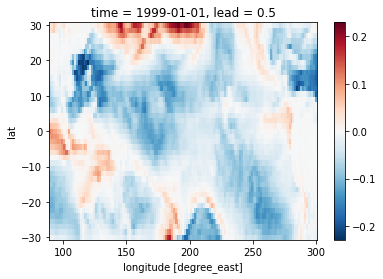

In [19]:
TX_array.isel(time=0).plot()

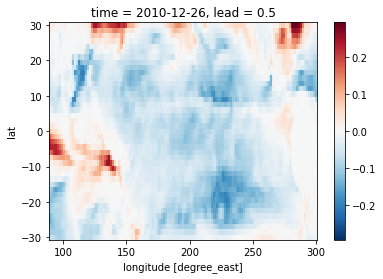

In [37]:
TX_array.isel(time=-6).plot()

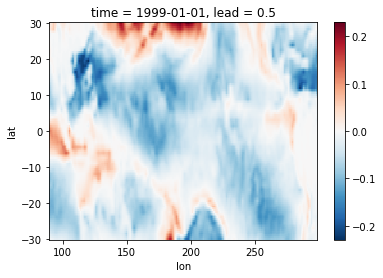

In [20]:
TX_array_MOM.isel(time=0).plot()

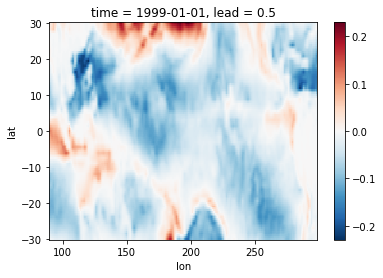

In [22]:
TX_array_MOM.isel(time=0).plot()

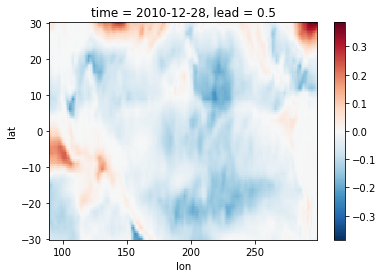

In [31]:
TX_array_MOM.isel(time=-4).plot()

In [29]:
121*209*3

75867

In [25]:
np.count_nonzero(np.isnan(TX_array_MOM))

0

In [14]:
TX_array

<xarray.DataArray (S: 4383, L: 1, Y: 41, X: 240)>
array([[[[ 1.08545320e-02,  1.54028162e-02,  2.16236264e-02, ...,
           3.35675403e-02,  7.81026436e-03,  1.67295989e-03],
         [ 7.99518544e-03,  1.11323586e-02,  2.58082785e-02, ...,
           3.24545428e-02,  1.51550630e-02,  8.44219141e-03],
         [ 1.00320168e-02,  1.15487995e-02,  1.81807503e-02, ...,
           2.70451047e-02,  1.77242085e-02,  1.07264202e-02],
         ...,
         [-2.62956284e-02, -2.49314792e-02, -2.09170897e-02, ...,
          -2.15094779e-02, -2.35614888e-02, -2.65105329e-02],
         [-5.12754265e-03, -2.94900825e-03, -8.82796303e-04, ...,
          -7.17945769e-03, -7.87968375e-03, -7.57699367e-03],
         [ 1.99337676e-02,  2.36225389e-02,  2.61435155e-02, ...,
           3.90606700e-03,  5.79373725e-03,  1.18176686e-02]]],


       [[[-8.58345721e-03,  4.60166391e-03,  9.07318015e-03, ...,
          -5.71254408e-03, -8.15394055e-03, -8.66905972e-03],
         [-1.91926979e-03,  3.52818612e-03,  5.01775276e-03, ...,
          -4.87624155e-03, -3.96548677e-03, -5.18696290e-03],
         [-4.65039955e-03,  1.82929914e-03,  9.03283246e-04, ...,
...
         [-1.03010461e-01, -1.05105489e-01, -1.02329418e-01, ...,
          -9.75384340e-02, -9.51878577e-02, -9.73116755e-02],
         [-7.83517659e-02, -8.70682299e-02, -8.51947367e-02, ...,
          -7.59767741e-02, -7.74103403e-02, -7.42540807e-02]]],


       [[[ 5.12082421e-04,  3.90114641e-04,  1.34901749e-03, ...,
           2.15939654e-04,  1.15305782e-04,  5.56295039e-04],
         [-4.22071898e-03, -3.27584194e-03, -1.61594898e-03, ...,
          -2.20194086e-03, -1.53900450e-03, -3.34257819e-03],
         [-6.34000544e-03, -4.09340579e-03, -4.25080769e-03, ...,
          -8.14304966e-03, -5.59823867e-03, -6.36552740e-03],
         ...,
         [-8.95476565e-02, -9.42331553e-02, -8.96454901e-02, ...,
          -7.93826953e-02, -7.87854269e-02, -9.17284191e-02],
         [-7.15375543e-02, -7.66018629e-02, -7.40472674e-02, ...,
          -4.65199277e-02, -4.91528586e-02, -6.43126965e-02],
         [-4.91013601e-02, -5.44998124e-02, -6.40386567e-02, ...,
          -3.40892263e-02, -3.11114006e-02, -4.27087434e-02]]]],
      dtype=float32)
Coordinates:
  * S        (S) datetime64[ns] 1999-01-01 1999-01-02 ... 2010-12-30 2010-12-31
  * L        (L) float64 0.5
  * Y        (Y) float32 30.0 28.5 27.0 25.5 24.0 ... -25.5 -27.0 -28.5 -30.0
  * X        (X) float32 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5

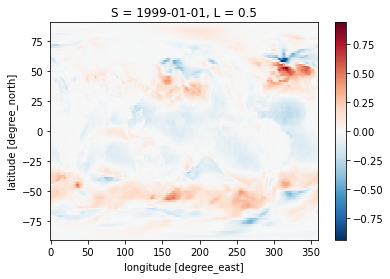

In [16]:
TX_array.isel(S=0).plot()

In [19]:
TX.shape

(4383, 1, 121, 240)

In [20]:
TX.dtype

dtype('float32')

In [17]:
TX.shape

(4383, 1, 121, 240)

In [18]:
TX_1.shape

NameError: name 'TX_1' is not defined

In [ ]:
TX_0

In [71]:
DATAX_0.close()
DATAX_1.close()

In [69]:
TX_0["L"] = np.array(cnt_1+.5)

ValueError: dimension 'L' already exists as a scalar variable

In [67]:
cnt_1

43

In [63]:
TX_1

<xarray.DataArray (S: 4383, L: 1, Y: 121, X: 240)>
array([[[[-5.30755962e-04, -6.87915657e-04, -8.44808179e-04, ...,
          -2.20864331e-05, -2.12260056e-04, -3.71157919e-04],
         [ 6.41178666e-03,  6.23160321e-03,  5.99873578e-03, ...,
           6.60441956e-03,  6.57087378e-03,  6.50102133e-03],
         [ 6.68503111e-03,  6.99647609e-03,  7.33565586e-03, ...,
           5.45133045e-03,  5.84168406e-03,  6.28474681e-03],
         ...,
         [-5.86021831e-03, -5.76986140e-03, -5.67432679e-03, ...,
          -5.99397952e-03, -5.88923227e-03, -5.86770801e-03],
         [-2.53397459e-03, -2.41368520e-03, -2.28600577e-03, ...,
          -2.67696101e-03, -2.60655629e-03, -2.57618073e-03],
         [ 9.89706162e-03,  1.02659315e-02,  1.05706677e-02, ...,
           8.83271825e-03,  9.24847275e-03,  9.53574851e-03]]],


       [[[-2.79119499e-02, -2.82848664e-02, -2.86517646e-02, ...,
          -2.68075652e-02, -2.72497274e-02, -2.75857467e-02],
         [-8.96722171e-03, -9.46526416e-03, -9.88774467e-03, ...,
          -7.85779860e-03, -8.27406999e-03, -8.59477278e-03],
         [ 2.07080832e-03,  1.74267136e-03,  1.42366090e-03, ...,
...
         [-6.99057564e-05, -6.61620870e-05, -6.81770180e-05, ...,
          -9.29872622e-05, -8.63074674e-05, -7.58836759e-05],
         [-4.89260361e-04, -4.59154107e-04, -4.07982618e-04, ...,
          -6.16160920e-04, -5.67421725e-04, -5.37022599e-04]]],


       [[[ 7.07478123e-03,  8.01046938e-03,  8.93558655e-03, ...,
           4.13732277e-03,  5.13952319e-03,  6.06528576e-03],
         [ 7.80204032e-03,  8.68447032e-03,  9.59944166e-03, ...,
           5.23328967e-03,  6.02203561e-03,  6.90321950e-03],
         [ 5.20770857e-03,  6.08994626e-03,  7.07965810e-03, ...,
           2.61654728e-03,  3.47974547e-03,  4.36934782e-03],
         ...,
         [-2.56038494e-02, -2.48968005e-02, -2.42421832e-02, ...,
          -2.65278965e-02, -2.61255782e-02, -2.59054080e-02],
         [-2.79058591e-02, -2.75011808e-02, -2.72699781e-02, ...,
          -2.75307782e-02, -2.76536364e-02, -2.78229862e-02],
         [-3.16644907e-02, -3.17870863e-02, -3.19172367e-02, ...,
          -3.10360789e-02, -3.12171876e-02, -3.14383581e-02]]]],
      dtype=float32)
Coordinates:
  * Y        (Y) float32 90.0 88.5 87.0 85.5 84.0 ... -85.5 -87.0 -88.5 -90.0
  * S        (S) datetime64[ns] 1999-01-01 1999-01-02 ... 2010-12-30 2010-12-31
  * X        (X) float32 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5
  * L        (L) timedelta64[ns] 1 days

In [61]:
TX_0

<xarray.DataArray (S: 4383, L: 1, Y: 121, X: 240)>
array([[[[-0.0340827 , -0.03395856, -0.03371237, ..., -0.03444679,
          -0.03440048, -0.0342299 ],
         [-0.0094512 , -0.00940359, -0.00933399, ..., -0.00993614,
          -0.00985857, -0.00961784],
         [ 0.00052827,  0.0003546 ,  0.00021238, ...,  0.00111715,
           0.0008991 ,  0.00069199],
         ...,
         [-0.04657296, -0.04414197, -0.04183165, ..., -0.05145899,
          -0.04967594, -0.04810344],
         [-0.0310175 , -0.02952429, -0.02808739, ..., -0.03376014,
          -0.03287053, -0.03185665],
         [-0.01021898, -0.00994394, -0.00958105, ..., -0.01120733,
          -0.01088609, -0.01059731]]],


       [[[-0.00673939, -0.00700601, -0.00727741, ..., -0.00588955,
          -0.00616278, -0.00642054],
         [ 0.00147399,  0.00124535,  0.00097534, ...,  0.00206589,
           0.00188062,  0.00170157],
         [ 0.00801462,  0.00788743,  0.00780376, ...,  0.00774328,
...
           0.00319232,  0.00285098],
         [-0.0016202 , -0.00193353, -0.00229352, ..., -0.00082886,
          -0.00105638, -0.00131927],
         [-0.00818769, -0.0079209 , -0.00763754, ..., -0.00898043,
          -0.00876176, -0.00848274]]],


       [[[-0.00522764, -0.00509274, -0.00496105, ..., -0.00565445,
          -0.00550822, -0.00536604],
         [-0.00755175, -0.0068488 , -0.00616086, ..., -0.00978334,
          -0.00896178, -0.00824123],
         [-0.00996012, -0.00940378, -0.00878203, ..., -0.01183296,
          -0.01130752, -0.01062228],
         ...,
         [-0.00056631, -0.00078238, -0.00100097, ..., -0.00064498,
          -0.00054975, -0.00053781],
         [ 0.00090747,  0.00083896,  0.00077393, ...,  0.00079223,
           0.00083535,  0.00085765],
         [-0.00265567, -0.00256991, -0.00253385, ..., -0.00285218,
          -0.00277192, -0.00273171]]]], dtype=float32)
Coordinates:
  * Y        (Y) float32 90.0 88.5 87.0 85.5 84.0 ... -85.5 -87.0 -88.5 -90.0
  * S        (S) datetime64[ns] 1999-01-01 1999-01-02 ... 2010-12-30 2010-12-31
  * X        (X) float32 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5
  * L        (L) timedelta64[ns] 00:00:00

In [ ]:
getattr(DATAX_0,"10u").squeeze()

In [16]:
v_4[sub_cat]

{'L': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])}

In [9]:
des = list(v_5.keys())

In [10]:
for x,m in enumerate(v_5[des[0]]):
    print(m,x)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44


In [12]:
des[0]

'L'

In [33]:
DATA  = xr.open_dataset(MODEL_DIR+f"10m_above_ground_{sub_cat}_L0.nc") #.sel(Y=slice(30,-30)).isel(S=slice(0,-1))

In [35]:
getattr(DATA,sub_cat)

<xarray.DataArray '10v' (S: 4383, L: 1, Y: 121, X: 240)>
[127282320 values with dtype=float32]
Coordinates:
  * Y        (Y) float32 90.0 88.5 87.0 85.5 84.0 ... -85.5 -87.0 -88.5 -90.0
  * S        (S) datetime64[ns] 1999-01-01 1999-01-02 ... 2010-12-30 2010-12-31
  * X        (X) float32 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5
  * L        (L) timedelta64[ns] 00:00:00
Attributes:
    pointwidth:      0.0
    gribPDSpattern:  04XXXX003C0203
    long_name:       10 metre v-velocity
    units:           m/s
    standard_name:   northward_wind

In [37]:
getattr(DATA,sub_cat).nbytes//1e6

509.0

In [38]:
DATA1  = xr.open_dataset(MODEL_DIR+f"10m_above_ground_{sub_cat}_L1.nc") #.sel(Y=slice(30,-30)).isel(S=slice(0,-1))

In [40]:
getattr(DATA1,sub_cat)

<xarray.DataArray '10v' (S: 4383, L: 1, Y: 121, X: 240)>
[127282320 values with dtype=float32]
Coordinates:
  * Y        (Y) float32 90.0 88.5 87.0 85.5 84.0 ... -85.5 -87.0 -88.5 -90.0
  * S        (S) datetime64[ns] 1999-01-01 1999-01-02 ... 2010-12-30 2010-12-31
  * X        (X) float32 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5
  * L        (L) timedelta64[ns] 1 days
Attributes:
    pointwidth:      0.0
    gribPDSpattern:  04XXXX003C0203
    long_name:       10 metre v-velocity
    units:           m/s
    standard_name:   northward_wind

In [15]:
dataset

'10m_above_ground'

In [28]:
MODEL_DIR

'/media/brayan/TOSHIBA_EXT/DATA/RAW_DATA/S2S/NCEP/reforecast/control/10m_above_ground.10v'

In [ ]:
L = 

In [ ]:
DATA  = xr.open_dataset(f"/media/brayan/TOSHIBA_4TB/S2S/raw_data/NCEP/reforecast/{type_sim}/{variable}/"+variable.split(".")[0]+"_"+variable.split(".")[-1]+f"_LB{lead}.nc").sel(Y=slice(30,-30)).isel(S=slice(0,-1))

In [35]:
list(list(MODELS.values())[0].values())[0]

{'perturbed': {'sfc_temperature': {'wtmp': {'LB': array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
           12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5,
           23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5,
           34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5]),
    'M': array([1, 2, 3])}},
  '10m_above_ground': {'10u': {'L': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
           17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
           34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
    'M': array([1, 2, 3])},
   '10v': {'L': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
           17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
           34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
    'M': array([1, 2, 3])}}},
 'control': {'sfc_temperature': {'wtmp': {'LB': array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5

In [ ]:
if type_sim == "control":
    if variable in Mean_vars_LB:
        DATA  = xr.open_dataset(f"/media/brayan/TOSHIBA_4TB/S2S/raw_data/NCEP/reforecast/{type_sim}/{variable}/"+variable.split(".")[0]+"_"+variable.split(".")[-1]+f"_LB{lead}.nc").sel(Y=slice(30,-30)).isel(S=slice(0,-1))
        Anom , Clim           = anom_clim_LB(DATA , lead  )
        Anom_Dataset_std      = ((Anom - Anom.mean("S"))/Anom.std("S")).fillna(0)

        Clim_Dataset      = xr.Dataset({variable.split(".")[-1]:getattr(Clim,variable.split(".")[-1]),
                                "mean":getattr(Anom.mean("S"),variable.split(".")[-1]),
                                "std":getattr(Anom.std("S"),variable.split(".")[-1])})

        if lead == 0:
            Anom_Dataset_std.chunk(chunks={'Y':-1,'X':-1,'S': 1}).to_zarr("/media/brayan/DATA/S2S/NCEP/Anom"+variable.split(".")[0]+"_"+variable.split(".")[-1]+f"_{type_sim}.zarr", 
                                                                      mode="w" , consolidated=True)

            Clim_Dataset.chunk(chunks={'Y':-1,'X':-1}).to_zarr("/media/brayan/DATA/S2S/NCEP/Clim_Norma_"+variable.split(".")[0]+"_"+variable.split(".")[-1]+f"_{type_sim}.zarr", 
                                                                      mode="w" , consolidated=True)
        else:

            Anom_Dataset_std.chunk(chunks={'Y':-1,'X':-1,'S': 1}).to_zarr("/media/brayan/DATA/S2S/NCEP/Anom"+variable.split(".")[0]+"_"+variable.split(".")[-1]+f"_{type_sim}.zarr", 
                                                                      mode="a" , consolidated=True, append_dim = "LB")

            Clim_Dataset.chunk(chunks={'Y':-1,'X':-1}).to_zarr("/media/brayan/DATA/S2S/NCEP/Clim_Norma_"+variable.split(".")[0]+"_"+variable.split(".")[-1]+f"_{type_sim}.zarr", 
                                                                      mode="a" , consolidated=True, append_dim = "LB")                


In [32]:
list(MODELS.values())[0]["reforecast"]

{'perturbed': {'sfc_temperature': {'wtmp': {'LB': array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
           12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5,
           23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5,
           34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5]),
    'M': array([1, 2, 3])}},
  '10m_above_ground': {'10u': {'L': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
           17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
           34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
    'M': array([1, 2, 3])},
   '10v': {'L': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
           17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
           34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
    'M': array([1, 2, 3])}}},
 'control': {'sfc_temperature': {'wtmp': {'LB': array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5

In [28]:
list(list(MODELS.values())[0].values())[0]

{'perturbed': {'2m_above_ground': {'2t': {'LA': array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
           11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
           22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
           33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5]),
    'M': array([1, 2, 3])}},
  'sfc_precip': {'tp': {'L1': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
           18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
           35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
    'M': array([1, 2, 3])}},
  'sfc_temperature': {'wtmp': {'LB': array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
           12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5,
           23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5,
           34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5]),
    'M': array

In [ ]:
Insta_vars_L  = ["pressure_level_1.q", "pressure_level_2.gh", "pressure_level_2.t", "pressure_level_wind.u", "pressure_level_wind.v", "sfc_pressure.msl", "10m_above_ground.10u", "10m_above_ground.10v"]
Mean_vars_LB  = ["sfc_temperature.wtmp"]
Mean_vars_LA  = ["atmos_column.tcc", "2m_above_ground.2t"]

## Create Scrip 

In [3]:
import pandas as pd
import sys
sys.path.append('/home/brayan/mnsun/')
from utils import check_dir
import os

In [101]:
actual_date   = "20181103" #"".join(str(os.environ["date_processing"]).split("-"))
base_line     = "wget https://noaa-cfs-pds.s3.amazonaws.com/cfs.{ACTUAL_DATE}/{INIT}/6hrly_grib_{ENS}/ocnf{DATE_FORECAST}{INIT_FORE}.{ENS}.{ACTUAL_DATE}{INIT}.grb2"
OUTPUT_DIR    = "/home/brayan/DATA/AWS/" #str(os.environ["output"])
check_dir( OUTPUT_DIR, name=actual_date)
init_hour     = {"00":"06", "06":"12", "12":"18", "18":"00"}
date_forecast = pd.date_range(actual_date, freq="D", periods=45+1)

In [102]:
date_forecast

DatetimeIndex(['2018-11-03', '2018-11-04', '2018-11-05', '2018-11-06',
               '2018-11-07', '2018-11-08', '2018-11-09', '2018-11-10',
               '2018-11-11', '2018-11-12', '2018-11-13', '2018-11-14',
               '2018-11-15', '2018-11-16', '2018-11-17', '2018-11-18',
               '2018-11-19', '2018-11-20', '2018-11-21', '2018-11-22',
               '2018-11-23', '2018-11-24', '2018-11-25', '2018-11-26',
               '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30',
               '2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08',
               '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12',
               '2018-12-13', '2018-12-14', '2018-12-15', '2018-12-16',
               '2018-12-17', '2018-12-18'],
              dtype='datetime64[ns]', freq='D')

In [103]:
for ens in ["01"]: #,"02", "03", "04"
    check_dir( OUTPUT_DIR+f"/{actual_date}/", name=ens)
    with open(f"{OUTPUT_DIR}" + f"/{actual_date}/{ens}/" + actual_date + "_download.txt", "w") as f:
        for hour in ["00", "06", "12", "18"]:
            for t in range(45):
                if t == 0:
                    f.write(base_line.format(ACTUAL_DATE = actual_date, INIT = hour, ENS = ens, INIT_FORE = init_hour[hour],
                                             DATE_FORECAST = ''.join(str(date_forecast[t+1])[:10].split("-")) if hour == "18" else ''.join(str(date_forecast[t])[:10].split("-")) )+ "\n")
                else:
                    if hour == "18":
                        f.write(base_line.format(ACTUAL_DATE = actual_date, INIT = hour, ENS = ens, INIT_FORE = hour,
                                 DATE_FORECAST = ''.join(str(date_forecast[t])[:10].split("-")) if hour == "18" else ''.join(str(date_forecast[t])[:10].split("-")) )+ "\n")
                    else:
                        f.write(base_line.format(ACTUAL_DATE = actual_date, INIT = hour, ENS = ens, INIT_FORE = hour,
                                 DATE_FORECAST = ''.join(str(date_forecast[t+1])[:10].split("-")) if hour == "18" else ''.join(str(date_forecast[t])[:10].split("-")) )+ "\n")

# Data Missing

In [105]:
#!/usr/bin/env python
import os
import glob
import pandas as pd

actual_date   = "20181103" #"".join(str(os.environ["date_processing"]).split("-"))
OUTPUT_DIR    = "/home/brayan/DATA/AWS/" #str(os.environ["output"])

In [106]:
for ens in ["01"]: #,"02", "03", "04"
    list_exist = [ ff.split("/")[-1] for ff in glob.glob(f"/home/brayan/DATA/AWS/{actual_date}/{ens}/*grb2")]
    list_create = []
    list_original = []
    with open (f"/home/brayan/DATA/AWS/{actual_date}/{ens}/"+actual_date +"_download.txt", 'r') as myfile:
        for myline in myfile:           
            list_create.append(myline.split("/")[-1][:-1])
            list_original.append(myline)

    if len(list_create) == len(list_exist):
        with open(f"{OUTPUT_DIR}" + f"/{actual_date}/{ens}/" + actual_date + "_download.txt", "w") as f:
            f.write(" ")
    else:
        list_missing = list_create.copy()        
        [list_missing.remove(i) for i in list_exist]
        list_final = []
        for miss in list_missing:
            for find in list_original:
                if find[73:-1] == miss:
                    list_final.append(find)    
        with open(f"{OUTPUT_DIR}" + f"/{actual_date}/{ens}/" + actual_date + "_download.txt", "w") as f:
            for re in list_final:
                date = pd.date_range( re[77:77+4]+ "-" +re[77+4:77+6]+"-" + re[77+6:77+8] +" " +re[77+8:77+10] + ":00:00", periods=1, freq='6H').shift(6, freq='H')
                f.write(re[:77]+str(date.values[0])[:4]+str(date.values[0])[5:7]+str(date.values[0])[8:10]+str(date.values[0])[11:13]+re[87:])

# Create day data

In [107]:
import xarray as xr
import warnings
import numpy as np
import pandas as pd
import xesmf as xe
import glob
import re
import sys
import os
sys.path.append('/home/brayan/mnsun/')
from utils import check_dir
warnings.filterwarnings('ignore')

In [108]:
# Dictorionary acumulation
day_year = {}
acum     = 0
day_year["01"] = acum
for contador, dm in enumerate([31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30]):
    acum += dm
    if contador < 8:
        day_year[f"0{contador+2}"] = acum
    else: 
        day_year[f"{contador+2}"] = acum

In [109]:
# Start code
actual_date = "20181103" # "".join(str(os.environ["date_processing"]).split("-"))
OUTPUT_DIR  = "/home/brayan/DATA/AWS/" #str(os.environ["output"])

In [110]:
var = "uflx"

In [111]:
ens = "01"

In [112]:
dict_vars = {}

In [113]:
for hour_utc in ["00","06","12","18"]:
    list_exist = glob.glob(OUTPUT_DIR+actual_date+f"/{ens}/*{actual_date}{hour_utc}.grb2")
    list_exist.sort()
    DATA = xr.open_mfdataset(list_exist, engine="cfgrib", concat_dim = 'time',
                         combine='nested',filter_by_keys={'typeOfLevel': 'surface'}).sel(latitude=slice(30,-30),
                                                                           longitude=slice(90,298))
    dates_day = pd.date_range(actual_date[:4]+"-"+actual_date[4:6]+"-"+actual_date[6:], periods=45, freq="D")
    
    list_missing = []
    with open (f"/home/brayan/DATA/AWS/{actual_date}/{ens}/"+actual_date +"_download.txt", 'r') as myfile:
        for myline in myfile:           
            list_missing.append(myline)
            
    # Para la hora 18
    pattern = re.compile(".*"+actual_date+f"{hour_utc}.grb2\n")
    newlist = list(filter(pattern.match, list_missing))
    if len(newlist) != 0:
        for lt in newlist:
            if lt.split("ocnf")[-1][:10] == ''.join(str(pd.date_range(actual_date, periods=2, freq="D")[-1])[:10].split("-"))+"18":
                date_miss = ''.join(str(pd.date_range(actual_date, periods=2, freq="D")[-1])[:10].split("-"))
            else:
                date_miss = lt.split("ocnf")[-1][:8]
            dates_day = dates_day.drop(date_miss)
        DATA["time"]  = dates_day
        date_interp   = pd.date_range(actual_date[:4]+"-"+actual_date[4:6]+"-"+actual_date[6:], periods=45, freq="D")
        VAR1          = getattr(DATA, var).interp(latitude=np.arange(30,-30-.5,-.5)).chunk(chunks={'time': -1}).interp(time=date_interp).rename(longitude="lon").rename(latitude="lat")    
    else:
        DATA["time"]  = dates_day
        VAR1          = getattr(DATA, var).interp(latitude=np.arange(30,-30-.5,-.5)).rename(longitude="lon").rename(latitude="lat")
    VAR1 = VAR1.interpolate_na(dim="lon", method="zero", fill_value="extrapolate")
    dict_vars[hour_utc] = VAR1

In [117]:
VAR_ = xr.concat([ dict_vars["00"].expand_dims("hours"), dict_vars["06"].expand_dims("hours"),
                   dict_vars["12"].expand_dims("hours"), dict_vars["18"].expand_dims("hours")], dim="hours").assign_coords( hours = ("hours",
                   pd.date_range(actual_date[:4]+"-"+actual_date[4:6]+"-"+actual_date[6:], periods=4, freq="6H"))).mean("hours") 

In [118]:
VAR_

,Array,Chunk
Bytes,4.55 MB,101.16 kB
Shape,"(45, 121, 209)","(1, 121, 209)"
Count,2762 Tasks,45 Chunks
Type,float32,numpy.ndarray


In [116]:
dict_vars["18"]

,Array,Chunk
Bytes,4.55 MB,101.16 kB
Shape,"(45, 121, 209)","(1, 121, 209)"
Count,545 Tasks,45 Chunks
Type,float32,numpy.ndarray


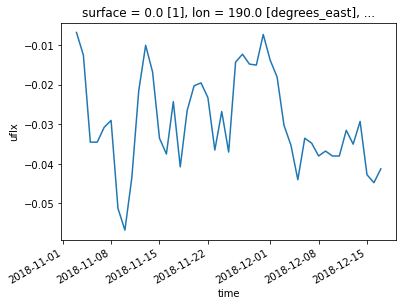

In [120]:
VAR_.isel(lat=60,lon=100).plot()

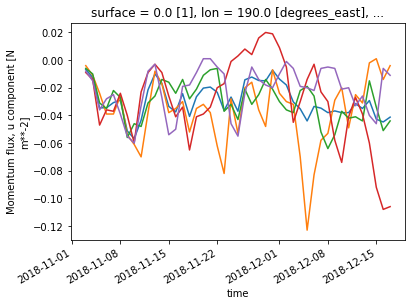

In [121]:
VAR_.isel(lat=60,lon=100).plot()
dict_vars["00"].isel(lat=60,lon=100).plot()
dict_vars["06"].isel(lat=60,lon=100).plot()
dict_vars["12"].isel(lat=60,lon=100).plot()
dict_vars["18"].isel(lat=60,lon=100).plot()

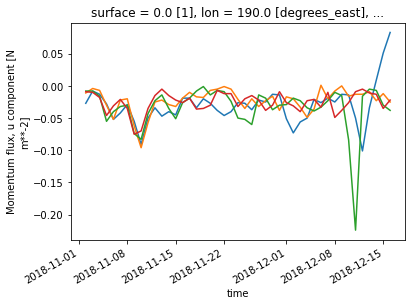

In [99]:
dict_vars["00"].isel(lat=60,lon=100).plot()
dict_vars["06"].isel(lat=60,lon=100).plot()
dict_vars["12"].isel(lat=60,lon=100).plot()
dict_vars["18"].isel(lat=60,lon=100).plot()

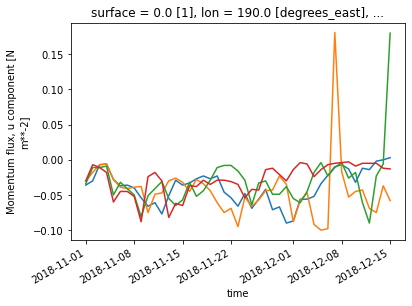

In [81]:
dict_vars["00"].isel(lat=60,lon=100).plot()
dict_vars["06"].isel(lat=60,lon=100).plot()
dict_vars["12"].isel(lat=60,lon=100).plot()
dict_vars["18"].isel(lat=60,lon=100).plot()

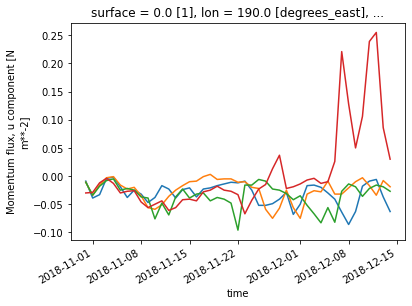

In [27]:
dict_vars["00"].isel(lat=60,lon=100).plot()
dict_vars["06"].isel(lat=60,lon=100).plot()
dict_vars["12"].isel(lat=60,lon=100).plot()
dict_vars["18"].isel(lat=60,lon=100).plot()

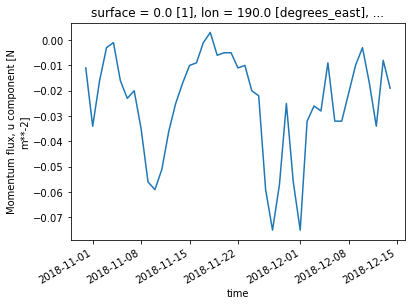

In [25]:
dict_vars["06"].isel(lat=60,lon=100).plot()

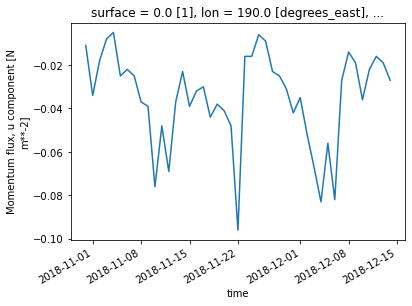

In [26]:
dict_vars["12"].isel(lat=60,lon=100).plot()

In [37]:
hour_utc = "18"

In [38]:
list_exist = glob.glob(OUTPUT_DIR+actual_date+f"/{ens}/*{actual_date}{hour_utc}.grb2")
list_exist.sort()

In [39]:
DATA = xr.open_mfdataset(list_exist, engine="cfgrib", concat_dim = 'time',
                         combine='nested',filter_by_keys={'typeOfLevel': 'surface'}).sel(latitude=slice(30,-30),
                                                                           longitude=slice(90,298))

Ignoring index file '/home/brayan/DATA/AWS/20181031/01/ocnf2018110100.01.2018103118.grb2.923a8.idx' incompatible with GRIB file
Ignoring index file '/home/brayan/DATA/AWS/20181031/01/ocnf2018110218.01.2018103118.grb2.923a8.idx' incompatible with GRIB file
Ignoring index file '/home/brayan/DATA/AWS/20181031/01/ocnf2018110318.01.2018103118.grb2.923a8.idx' incompatible with GRIB file
Ignoring index file '/home/brayan/DATA/AWS/20181031/01/ocnf2018110418.01.2018103118.grb2.923a8.idx' incompatible with GRIB file
Ignoring index file '/home/brayan/DATA/AWS/20181031/01/ocnf2018110518.01.2018103118.grb2.923a8.idx' incompatible with GRIB file
Ignoring index file '/home/brayan/DATA/AWS/20181031/01/ocnf2018110618.01.2018103118.grb2.923a8.idx' incompatible with GRIB file
Ignoring index file '/home/brayan/DATA/AWS/20181031/01/ocnf2018110718.01.2018103118.grb2.923a8.idx' incompatible with GRIB file
Ignoring index file '/home/brayan/DATA/AWS/20181031/01/ocnf2018110818.01.2018103118.grb2.923a8.idx' inco

In [41]:
dates_day = pd.date_range(actual_date[:4]+"-"+actual_date[4:6]+"-"+actual_date[6:], periods=45, freq="D")

In [47]:
list_missing = []
with open (f"/home/brayan/DATA/AWS/{actual_date}/{ens}/"+actual_date +"_download.txt", 'r') as myfile:
    for myline in myfile:           
        list_missing.append(myline)

In [48]:
# Para la hora 18
pattern = re.compile(".*"+actual_date+"18.grb2\n")
newlist = list(filter(pattern.match, list_missing))
if len(newlist) != 0:
    for lt in newlist:
        if lt.split("ocnf")[-1][:10] == ''.join(str(pd.date_range(actual_date, periods=2, freq="D")[-1])[:10].split("-"))+"18":
            date_miss = ''.join(str(pd.date_range(actual_date, periods=2, freq="D")[-1])[:10].split("-"))
        else:
            date_miss = lt.split("ocnf")[-1][:8]
        dates_day = dates_day.drop(date_miss)
    DATA["time"]  = dates_day
    date_interp   = pd.date_range(actual_date[:4]+"-"+actual_date[4:6]+"-"+actual_date[6:], periods=45, freq="D")
    VAR1          = getattr(DATA, var).interp(latitude=np.arange(30,-30-.5,-.5)).chunk(chunks={'time': -1}).interp(time=date_interp).rename(longitude="lon").rename(latitude="lat")    
else:
    DATA["time"]  = dates_day
    VAR1          = getattr(DATA, var).interp(latitude=np.arange(30,-30-.5,-.5)).rename(longitude="lon").rename(latitude="lat")      

In [51]:
VAR1 = VAR1.interpolate_na(dim="lon", method="zero", fill_value="extrapolate")

In [ ]:
VAR1.isel(lat=60,lon=100).plot()

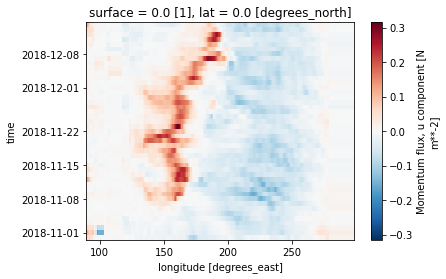

In [55]:
VAR1.sel(lat=0).plot()

In [53]:
VAR1

<xarray.DataArray 'uflx' (time: 45, lat: 121, lon: 209)>
dask.array<transpose, shape=(45, 121, 209), dtype=float32, chunksize=(45, 121, 209), chunktype=numpy.ndarray>
Coordinates:
    surface  float64 0.0
  * lon      (lon) float64 90.0 91.0 92.0 93.0 94.0 ... 295.0 296.0 297.0 298.0
  * lat      (lat) float64 30.0 29.5 29.0 28.5 28.0 ... -28.5 -29.0 -29.5 -30.0
  * time     (time) datetime64[ns] 2018-10-31 2018-11-01 ... 2018-12-14
Attributes:
    GRIB_paramId:                             260062
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      65160
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  360
    GRIB_Ny:                                  181
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           uflx
    GRIB_gridDefinitionDescription:           Latitude/longitude. Also called...
    GRIB_iDirectionIncrementInDegrees:        1.0
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        1.0
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.0
    GRIB_missingValue:                        9999
    GRIB_name:                                Momentum flux, u component
    GRIB_shortName:                           uflx
    GRIB_units:                               N m**-2
    long_name:                                Momentum flux, u component
    units:                                    N m**-2
    standard_name:                            unknown

In [49]:
VAR1

<xarray.DataArray 'uflx' (time: 45, lat: 121, lon: 209)>
dask.array<transpose, shape=(45, 121, 209), dtype=float32, chunksize=(45, 121, 209), chunktype=numpy.ndarray>
Coordinates:
    surface  float64 0.0
  * lon      (lon) float64 90.0 91.0 92.0 93.0 94.0 ... 295.0 296.0 297.0 298.0
  * lat      (lat) float64 30.0 29.5 29.0 28.5 28.0 ... -28.5 -29.0 -29.5 -30.0
  * time     (time) datetime64[ns] 2018-10-31 2018-11-01 ... 2018-12-14
Attributes:
    GRIB_paramId:                             260062
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      65160
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  360
    GRIB_Ny:                                  181
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           uflx
    GRIB_gridDefinitionDescription:           Latitude/longitude. Also called...
    GRIB_iDirectionIncrementInDegrees:        1.0
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        1.0
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.0
    GRIB_missingValue:                        9999
    GRIB_name:                                Momentum flux, u component
    GRIB_shortName:                           uflx
    GRIB_units:                               N m**-2
    long_name:                                Momentum flux, u component
    units:                                    N m**-2
    standard_name:                            unknown

In [48]:
VAR1 = VAR1.interpolate_na(dim="lon", method="zero", fill_value="extrapolate")

In [51]:
VAR1

,Array,Chunk
Bytes,4.55 MB,101.16 kB
Shape,"(45, 121, 209)","(1, 121, 209)"
Count,545 Tasks,45 Chunks
Type,float32,numpy.ndarray


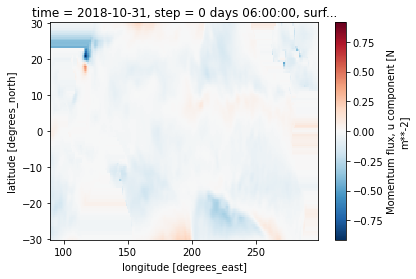

In [49]:
VAR1.isel(time=0).plot()

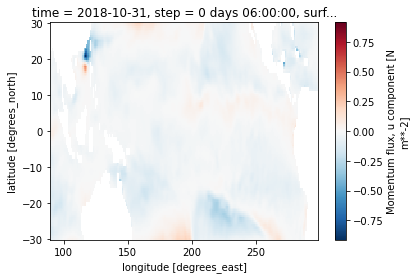

In [47]:
VAR1.isel(time=0).plot()

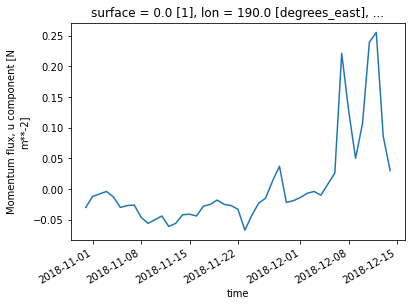

In [52]:
VAR1.isel(lat=60,lon=100).plot()

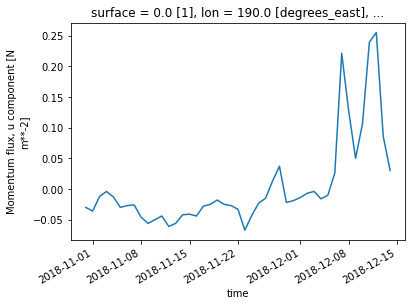

In [50]:
VAR1.isel(lat=60,lon=100).plot()

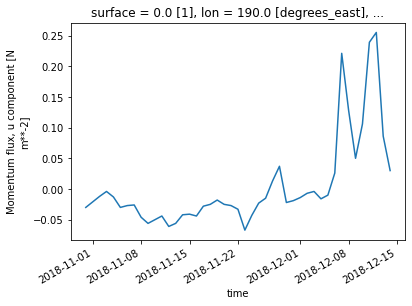

In [33]:
VAR1.isel(lat=60,lon=100).plot()

In [11]:
VAR1

<xarray.DataArray 'uflx' (time: 45, lat: 121, lon: 209)>
dask.array<transpose, shape=(45, 121, 209), dtype=float32, chunksize=(45, 121, 209), chunktype=numpy.ndarray>
Coordinates:
    surface  float64 0.0
  * lon      (lon) float64 90.0 91.0 92.0 93.0 94.0 ... 295.0 296.0 297.0 298.0
  * lat      (lat) float64 30.0 29.5 29.0 28.5 28.0 ... -28.5 -29.0 -29.5 -30.0
  * time     (time) datetime64[ns] 2018-10-31 2018-11-01 ... 2018-12-14
Attributes:
    GRIB_paramId:                             260062
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      65160
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  360
    GRIB_Ny:                                  181
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           uflx
    GRIB_gridDefinitionDescription:           Latitude/longitude. Also called...
    GRIB_iDirectionIncrementInDegrees:        1.0
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        1.0
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.0
    GRIB_missingValue:                        9999
    GRIB_name:                                Momentum flux, u component
    GRIB_shortName:                           uflx
    GRIB_units:                               N m**-2
    long_name:                                Momentum flux, u component
    units:                                    N m**-2
    standard_name:                            unknown

In [11]:
DATA["time"]  = dates_day

In [14]:
date_interp   = pd.date_range(actual_date[:4]+"-"+actual_date[4:6]+"-"+actual_date[6:], periods=45, freq="D")

In [12]:
VAR1          = getattr(DATA, var).interp(latitude=np.arange(30,-30-.5,-.5)).chunk(chunks={'time': -1}).interp(time=np.arange(30,-30-.5,-.5)).rename(longitude="lon").rename(latitude="lat")

In [13]:
VAR1

,Array,Chunk
Bytes,4.45 MB,101.16 kB
Shape,"(44, 121, 209)","(1, 121, 209)"
Count,400 Tasks,44 Chunks
Type,float32,numpy.ndarray


In [82]:
DATA.time

<xarray.DataArray 'time' (time: 44)>
array(['2018-10-31T00:00:00.000000000', '2018-11-02T00:00:00.000000000',
       '2018-11-03T00:00:00.000000000', '2018-11-04T00:00:00.000000000',
       '2018-11-05T00:00:00.000000000', '2018-11-06T00:00:00.000000000',
       '2018-11-07T00:00:00.000000000', '2018-11-08T00:00:00.000000000',
       '2018-11-09T00:00:00.000000000', '2018-11-10T00:00:00.000000000',
       '2018-11-11T00:00:00.000000000', '2018-11-12T00:00:00.000000000',
       '2018-11-13T00:00:00.000000000', '2018-11-14T00:00:00.000000000',
       '2018-11-15T00:00:00.000000000', '2018-11-16T00:00:00.000000000',
       '2018-11-17T00:00:00.000000000', '2018-11-18T00:00:00.000000000',
       '2018-11-19T00:00:00.000000000', '2018-11-20T00:00:00.000000000',
       '2018-11-21T00:00:00.000000000', '2018-11-22T00:00:00.000000000',
       '2018-11-23T00:00:00.000000000', '2018-11-24T00:00:00.000000000',
       '2018-11-25T00:00:00.000000000', '2018-11-26T00:00:00.000000000',
       '2018-11-27T00:00:00.000000000', '2018-11-28T00:00:00.000000000',
       '2018-11-29T00:00:00.000000000', '2018-11-30T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-02T00:00:00.000000000',
       '2018-12-03T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2018-12-05T00:00:00.000000000', '2018-12-06T00:00:00.000000000',
       '2018-12-07T00:00:00.000000000', '2018-12-08T00:00:00.000000000',
       '2018-12-09T00:00:00.000000000', '2018-12-10T00:00:00.000000000',
       '2018-12-11T00:00:00.000000000', '2018-12-12T00:00:00.000000000',
       '2018-12-13T00:00:00.000000000', '2018-12-14T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time        (time) datetime64[ns] 2018-10-31 2018-11-02 ... 2018-12-14
    step        (time) timedelta64[ns] 0 days 06:00:00 ... 44 days
    surface     float64 0.0
    valid_time  (time) datetime64[ns] 2018-11-01 ... 2018-12-14T18:00:00

In [8]:
DATA

,Array,Chunk
Bytes,2.29 MB,51.00 kB
Shape,"(45, 61, 209)","(1, 61, 209)"
Count,225 Tasks,45 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,2.29 MB,51.00 kB
Shape,"(45, 61, 209)","(1, 61, 209)"
Count,225 Tasks,45 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [9]:
DATA.time

<xarray.DataArray 'time' (time: 45)>
array(['2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time        (time) datetime64[ns] 2018-10-31 2018-10-31 ... 2018-10-31
    step        (time) timedelta64[ns] 0 days 06:00:00 ... 44 days
    surface     float64 0.0
    valid_time  (time) datetime64[ns] 2018-10-31T06:00:00 ... 2018-12-14
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time